# About the Dataset

The diabetes_prediction_dataset.csv file contains medical and demographic data of patients, curated to assist in predicting the likelihood of diabetes. This dataset includes a range of features such as age, gender, BMI, hypertension, heart disease, smoking history, HbA1c level, and blood glucose level. It is ideal for constructing machine learning models aimed at predicting diabetes based on an individual's medical history and demographic profile.

# Dataset Features

* Gender
* Age
* Hypertension
* Heart Disease
* Smoking History
* BMI
* hBa1c Level
* Blood Glucose Level
* Diabetes

# Importing Libraries

In this section, we import all the necessary libraries required for data manipulation, visualization, machine learning model building, and evaluation. Each library plays a specific role in the overall workflow, from preprocessing the data to training models and evaluating their performance.

In [40]:
#  import libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
import matplotlib.patches as mpatches
import warnings
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, classification_report
from sklearn.svm import SVC

warnings.filterwarnings("ignore")


We load the dataset using Pandas and display the first 10 rows to get an overview of its structure and contents.


In [41]:
# Load dataset
df = pd.read_csv('diabetes_prediction_dataset.csv')
df.head(10)


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
5,Female,20.0,0,0,never,27.32,6.6,85,0
6,Female,44.0,0,0,never,19.31,6.5,200,1
7,Female,79.0,0,0,No Info,23.86,5.7,85,0
8,Male,42.0,0,0,never,33.64,4.8,145,0
9,Female,32.0,0,0,never,27.32,5.0,100,0


The `df.info()` method is used to display a concise summary of the dataset, including the number of entries, column names, data types, and any missing values.


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


The `df.describe()` method provides a statistical summary of the dataset, including measures such as mean, standard deviation, minimum, maximum, and quartiles for numerical features.


In [43]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


The `df.shape` attribute returns a tuple representing the dimensions of the dataset, including the number of rows and columns.


In [44]:
df.shape

(100000, 9)

The `df.isnull().sum()` method calculates the number of missing values for each column in the dataset, providing insight into data completeness.


In [45]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

To ensure data quality, we first check for duplicate entries in the dataset using `df.duplicated().sum()`, which counts the number of duplicate rows. After identifying any duplicates, we remove them using `df.drop_duplicates()`. We then confirm that duplicates have been successfully removed by rechecking with `df.duplicated().sum()`, which should return zero.


In [46]:
# check duplicate values
print(df.duplicated().sum())
# remove duplicate values
df = df.drop_duplicates()
print("______Removed Duplicate______")
print(df.duplicated().sum())

3854
______Removed Duplicate______
0


The `df.diabetes.value_counts()` method is used to count the number of occurrences of each unique value in the `diabetes` column, providing insight into the distribution of diabetes status in the dataset.


In [47]:
df.diabetes.value_counts()

diabetes
0    87664
1     8482
Name: count, dtype: int64

We start by counting the number of occurrences of each unique value in the `smoking_history` column using `df.smoking_history.value_counts()`. Next, we update the values to standardize the categories: replacing `'ever'` with `'never'` and `'not current'` with `'former'`. We also filter out rows where the `smoking_history` value is `'No Info'`, as these entries do not provide relevant information. Finally, we recheck the value counts to confirm the updates and the remaining categories.


In [48]:
df.smoking_history.value_counts()                      


smoking_history
never          34398
No Info        32887
former          9299
current         9197
not current     6367
ever            3998
Name: count, dtype: int64

In [49]:
df.replace( { 'ever' : 'never'}, inplace=True)
df.replace( { 'not current' : 'former'}, inplace=True) 
df = df[df['smoking_history'] != 'No Info'] 

In [50]:
df.smoking_history.value_counts()                      


smoking_history
never      38396
former     15666
current     9197
Name: count, dtype: int64

We begin by examining the distribution of values in the `gender` column using `df.gender.value_counts()`, which reveals three categories: `Female`, `Male`, and `Other`. To simplify the dataset, we exclude the `Other` category by filtering the rows. We then convert the remaining gender categories to numerical values: `Female` is replaced with `0` and `Male` with `1` for easier analysis and model training.


In [51]:
df.gender.value_counts() #it shows that we have 3 Types Female,Male and other. let's Drop Other Values then convert it to Numerical
df = df[df['gender']!='Other']
df.replace({'Female':0,'Male':1},inplace=True)

# Data Formatting and Filtering

To prepare the dataset for analysis and modeling, we need to ensure that all columns are in the correct format then we filter the dataset to retain only the rows where the `diabetes` column indicates a positive diagnosis (`1`), isolating the subset of data relevant for further analysis on individuals with diabetes.

In [52]:
# Ensure all necessary columns are properly formatted
df['HbA1c_level'] = pd.to_numeric(df['HbA1c_level'], errors='coerce')
df['smoking_history'] = df['smoking_history'].astype('category')
df['gender'] = df['gender'].astype('category')
df['hypertension'] = df['hypertension'].astype(int)
df['heart_disease'] = df['heart_disease'].astype(int)
df['blood_glucose_level'] = pd.to_numeric(df['blood_glucose_level'], errors='coerce')

# Filter the dataset to include only those with diabetes
df_diabetes = df[df['diabetes'] == 1]

# Data Visualization with Count Plots

We create a 2x2 grid of plots to visualize the relationship between different variables and diabetes status

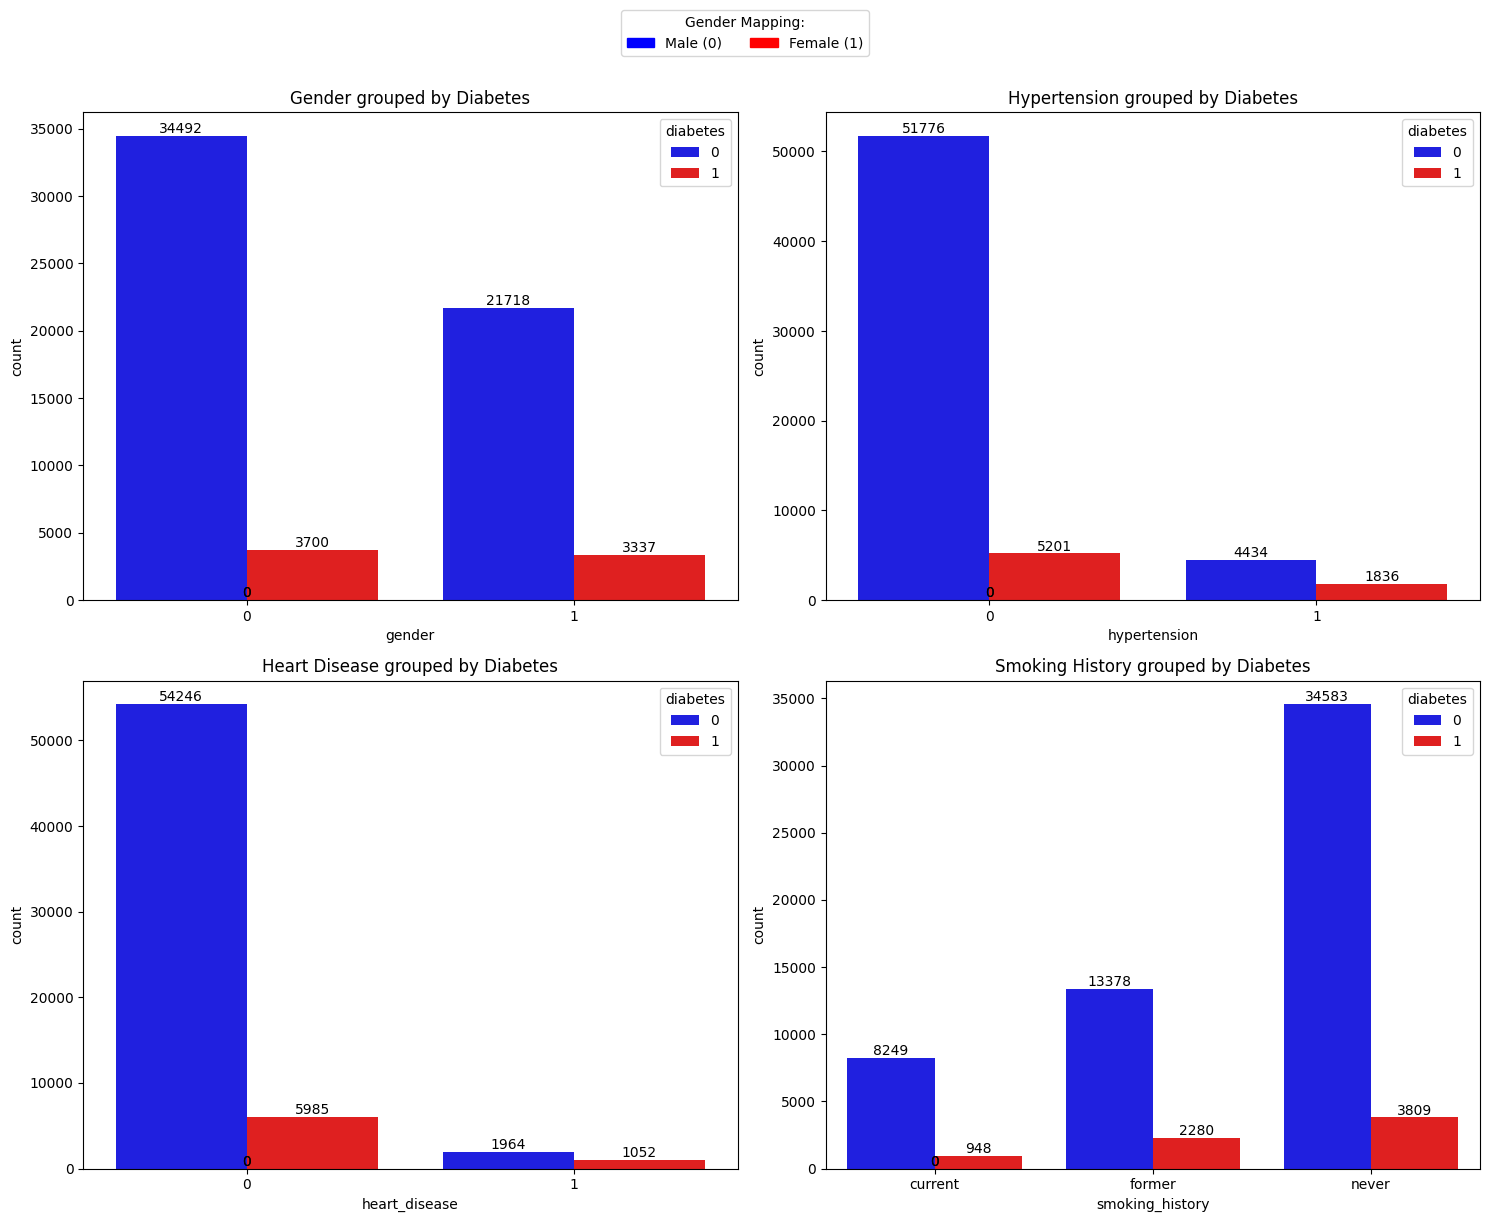

In [53]:
# Function to add counts on bars
def add_counts(ax):
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), 
                    textcoords='offset points')

# Set up the matplotlib figure
fig, axes = plt.subplots(2, 2, figsize=(15, 12))  # Adjust to 2x2 grid

# Define color palette with integer keys
palette = {0: 'blue', 1: 'red'}

# Plot gender grouped by diabetes
ax = sns.countplot(ax=axes[0, 0], x='gender', hue='diabetes', data=df, palette=palette)
axes[0, 0].set_title('Gender grouped by Diabetes')
add_counts(ax)

# Plot hypertension grouped by diabetes
ax = sns.countplot(ax=axes[0, 1], x='hypertension', hue='diabetes', data=df, palette=palette)
axes[0, 1].set_title('Hypertension grouped by Diabetes')
add_counts(ax)

# Plot heart disease grouped by diabetes
ax = sns.countplot(ax=axes[1, 0], x='heart_disease', hue='diabetes', data=df, palette=palette)
axes[1, 0].set_title('Heart Disease grouped by Diabetes')
add_counts(ax)

# Plot smoking history grouped by diabetes
ax = sns.countplot(ax=axes[1, 1], x='smoking_history', hue='diabetes', data=df, palette=palette)
axes[1, 1].set_title('Smoking History grouped by Diabetes')
add_counts(ax)

# Create custom legend for gender mapping
legend_labels = [mpatches.Patch(color='blue', label='Male (0)'), 
                 mpatches.Patch(color='red', label='Female (1)')]
fig.legend(handles=legend_labels, title='Gender Mapping:', loc='upper center', bbox_to_anchor=(0.5, 1.02), ncol=2)

# Adjust the layout
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to make space for the legend at the top

# Show the plots
plt.show()

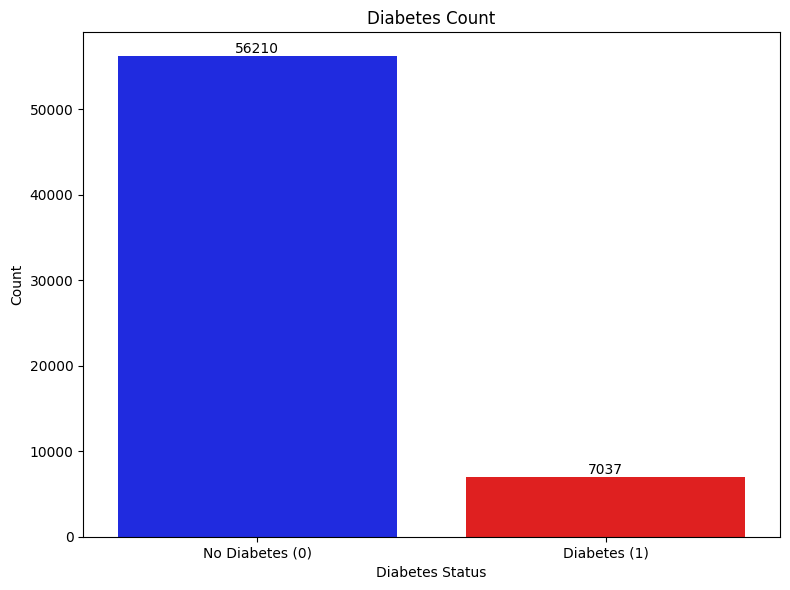

In [54]:
# Set up the matplotlib figure
plt.figure(figsize=(8, 6))

# Plotting the count of individuals with and without diabetes
ax = sns.countplot(x='diabetes', data=df, palette=['#000FFF', '#FF0000'])  # Custom colors

# Add title and labels
plt.title('Diabetes Count')
plt.xlabel('Diabetes Status')
plt.ylabel('Count')

# Annotate bars with their values
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), 
                textcoords='offset points')

plt.xticks(ticks=[0, 1], labels=['No Diabetes (0)', 'Diabetes (1)'])
plt.tight_layout()

# Show the plot
plt.show()

# Age Statistics and Visualization

Minimum age: 0.16
Maximum age: 80.0
Average age: 46.56192831280535

Diabetes Counts:
diabetes
0    56210
1     7037
Name: count, dtype: int64

Age Statistics by Diabetes Status:
           min   max
diabetes            
0         0.16  80.0
1         4.00  80.0


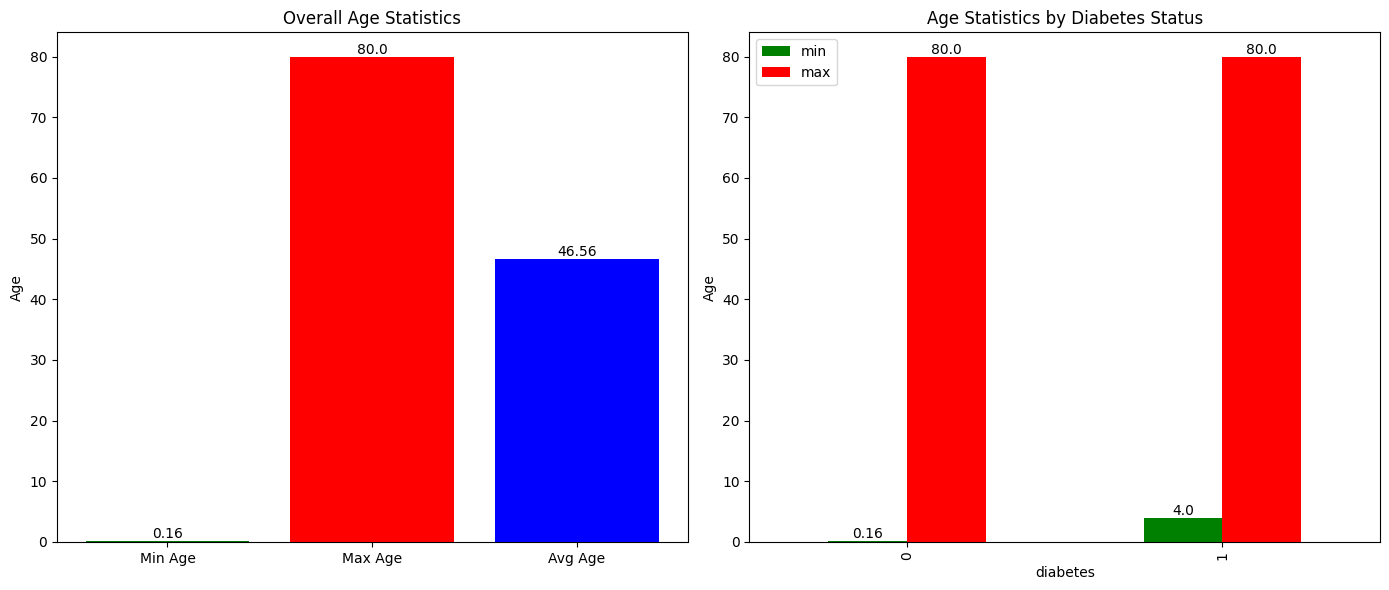

In [55]:
# Calculate minimum, maximum, and average age
min_age = df['age'].min()
max_age = df['age'].max()
avg_age = df['age'].mean()

# Count of individuals with and without diabetes
diabetes_counts = df['diabetes'].value_counts()

# Group by diabetes status and calculate min and max ages
grouped_ages = df.groupby('diabetes')['age'].agg(['min', 'max'])

# Print the results
print(f"Minimum age: {min_age}")
print(f"Maximum age: {max_age}")
print(f"Average age: {avg_age}")
print("\nDiabetes Counts:")
print(diabetes_counts)
print("\nAge Statistics by Diabetes Status:")
print(grouped_ages)

# Plotting
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Plot for overall min, max, and average age
age_stats = [min_age, max_age, avg_age]
age_labels = ['Min Age', 'Max Age', 'Avg Age']
colors = ['green', 'red', 'blue']

bars = ax[0].bar(age_labels, age_stats, color=colors)
ax[0].set_title('Overall Age Statistics')
ax[0].set_ylabel('Age')

# Annotate bars with their values
for bar in bars:
    yval = bar.get_height()
    ax[0].text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom', ha='center')

# Plot for min and max ages grouped by diabetes status
grouped_bars = grouped_ages.plot(kind='bar', ax=ax[1], color=['green', 'red'])
ax[1].set_title('Age Statistics by Diabetes Status')
ax[1].set_ylabel('Age')

# Annotate bars with their values
for p in ax[1].patches:
    height = p.get_height()
    ax[1].text(p.get_x() + p.get_width()/2, height, round(height, 2), ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Cross-tabulation and Visualization

1. **Cross-tabulate Data**:
   - The data is cross-tabulated to examine the relationship between diabetes status and smoking history.

2. **Visualize Data**:
   - Two types of visualizations are used:
     - **Heatmap**: Shows the intensity of counts in a color-coded format.
     - **Bar Plot**: Displays the count of each smoking history category for different diabetes status groups.

3. **Annotate and Display**:
   - Both plots include annotations to highlight specific values and are displayed together for comparison.


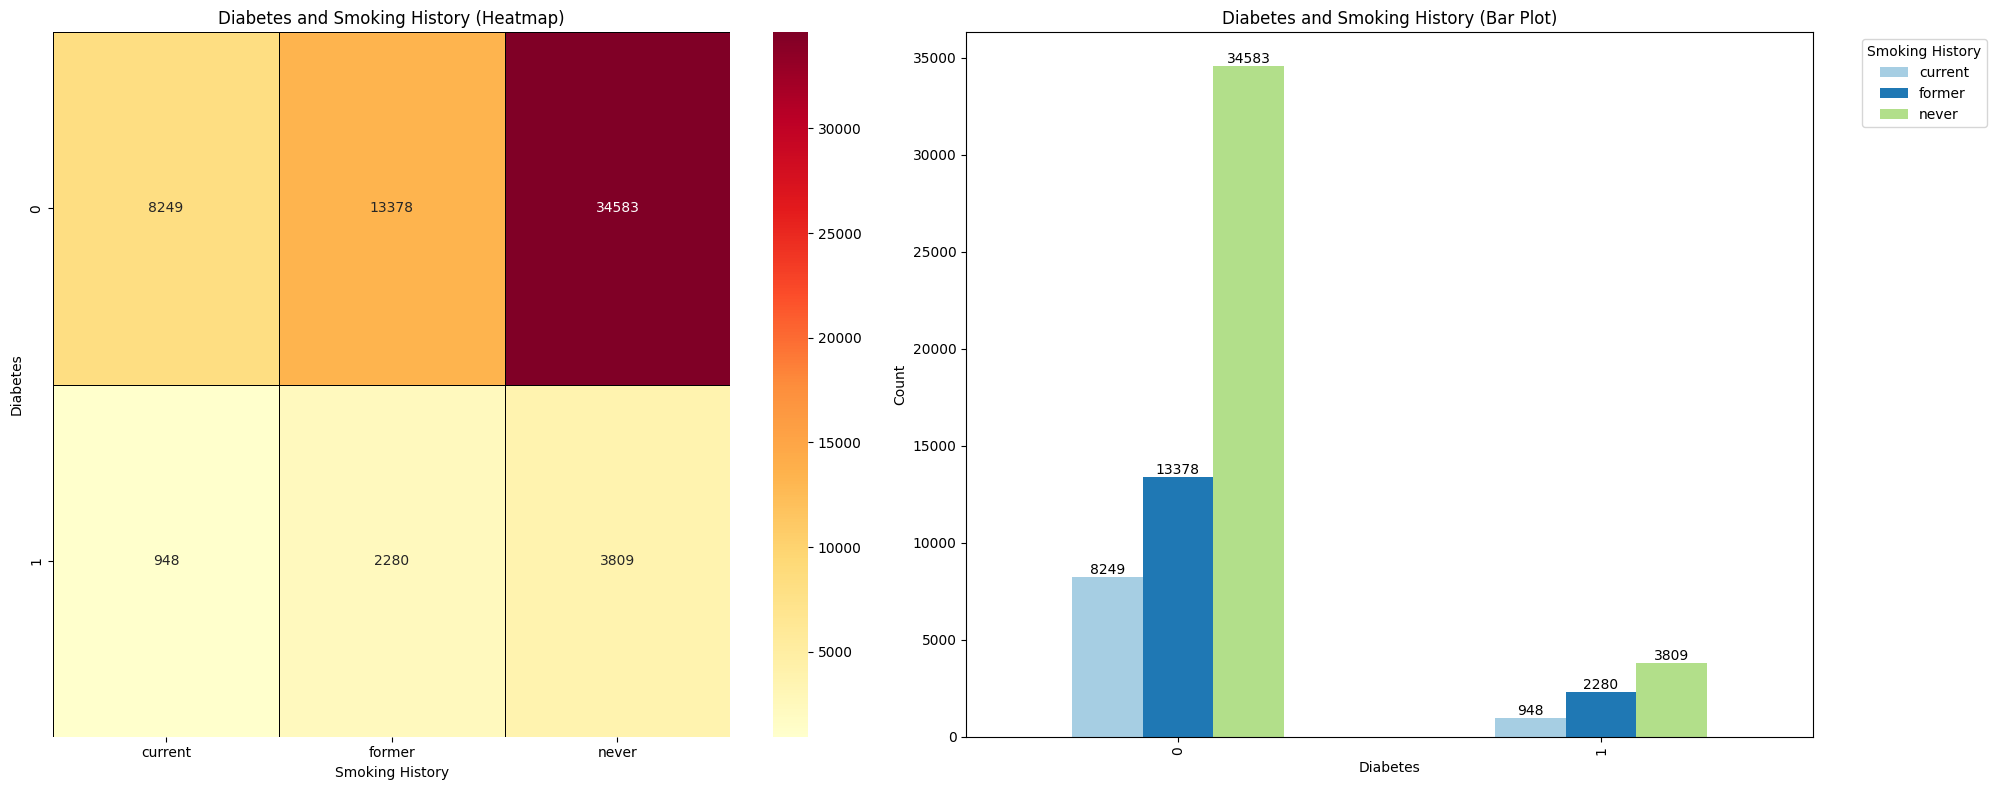

In [56]:
# Cross-tabulate diabetes and smoking history
cross_table = pd.crosstab(df['diabetes'], df['smoking_history'])

# Create subplots
fig, ax = plt.subplots(1, 2, figsize=(20, 8))

# Plotting the cross table as a heatmap
sns.heatmap(cross_table, cmap='YlOrRd', annot=True, fmt='d', linewidths=0.5, linecolor='black', ax=ax[0])
ax[0].set_title('Diabetes and Smoking History (Heatmap)')
ax[0].set_xlabel('Smoking History')
ax[0].set_ylabel('Diabetes')

# Plotting the cross table with separate bars for smoking history
cross_table.plot(kind='bar', stacked=False, ax=ax[1], color=plt.cm.Paired.colors)
ax[1].set_title('Diabetes and Smoking History (Bar Plot)')
ax[1].set_xlabel('Diabetes')
ax[1].set_ylabel('Count')
ax[1].legend(title='Smoking History', bbox_to_anchor=(1.05, 1), loc='upper left')

# Annotate bars with their values
for container in ax[1].containers:
    ax[1].bar_label(container)

plt.tight_layout()
plt.show()

In [57]:
# encode the data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])
df['smoking_history'] = le.fit_transform(df['smoking_history'])

# Principal Component Analysis (PCA)

1. **Select Features and Target**:
   - The features for PCA are selected from the dataset, and the target variable (`diabetes`) is separated.

2. **Standardize Features**:
   - Features are standardized to have a mean of 0 and a standard deviation of 1, which is crucial for PCA.

3. **Apply PCA**:
   - PCA is applied to the standardized features to reduce dimensionality while retaining as much variance as possible.

4. **Plot Explained Variance**:
   - A plot is created to show the cumulative explained variance by the number of principal components.
   - The optimal number of components is identified, which explains at least 95% of the variance.

5. **Print Explained Variance Ratios**:
   - The cumulative explained variance for each principal component is printed to understand their contribution.

6. **Apply PCA with Optimal Components**:
   - PCA is re-applied using the optimal number of components that capture the majority of the variance.


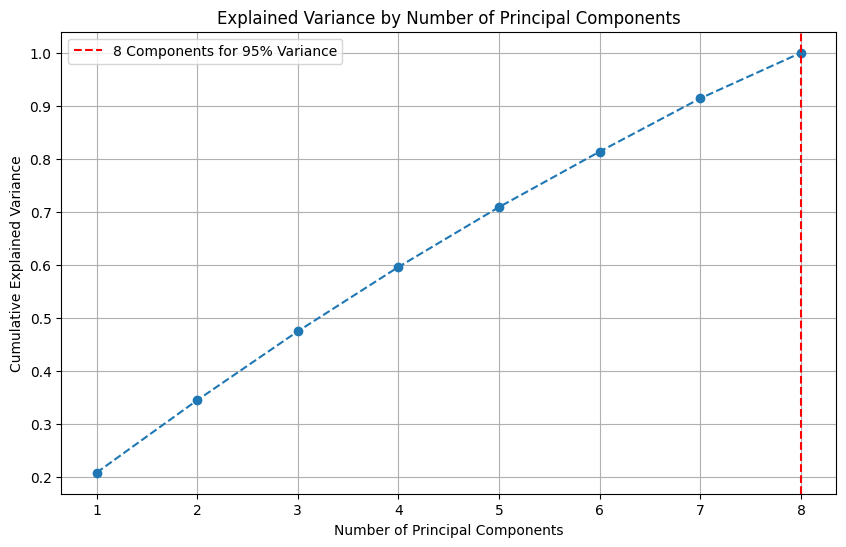

Principal Component 1: 0.2085 cumulative explained variance
Principal Component 2: 0.3451 cumulative explained variance
Principal Component 3: 0.4750 cumulative explained variance
Principal Component 4: 0.5963 cumulative explained variance
Principal Component 5: 0.7092 cumulative explained variance
Principal Component 6: 0.8137 cumulative explained variance
Principal Component 7: 0.9141 cumulative explained variance
Principal Component 8: 1.0000 cumulative explained variance


In [58]:
# Selecting features and target variable
features = ['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history', 'bmi', 'HbA1c_level', 'blood_glucose_level']
X = df[features]
y = df['diabetes']

# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Applying PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Plotting the cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), 
         pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.title('Explained Variance by Number of Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()

# Find the index of the maximum cumulative explained variance
max_index = pca.explained_variance_ratio_.cumsum().argmax()
# Find the index of the number of components to explain 95% variance
explained_variance = pca.explained_variance_ratio_.cumsum()
n_components = np.argmax(explained_variance >= 0.95) + 1

# Annotate the point where the cumulative variance reaches 95%
plt.axvline(x=n_components, color='red', linestyle='--', label=f'{n_components} Components for 95% Variance')
plt.legend()

plt.show()

# Printing explained variance ratios
for i, ratio in enumerate(pca.explained_variance_ratio_.cumsum()):
    print(f'Principal Component {i+1}: {ratio:.4f} cumulative explained variance')

# Choose the number of components that explain most of the variance
n_components = max_index + 1

# Applying PCA with the optimal number of components
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)

# Model Training and Evaluation

1. **Data Preparation**:
   - **Features and Target**: Select features for training and the target variable (`diabetes`).
   - **Categorical and Numerical Features**: Define which features are categorical and which are numerical.

2. **Preprocessing**:
   - **Preprocessor**: Set up a pipeline to scale numerical features and one-hot encode categorical features.

3. **Model Pipeline**:
   - **Pipeline**: Create a pipeline that includes preprocessing and an XGBoost classifier.

4. **Train-Test Split**:
   - **Split Data**: Divide the data into training and testing sets.

5. **Train Model**:
   - **Fit Model**: Train the XGBoost model on the training data.

6. **Evaluate Model**:
   - **Predictions**: Make predictions on the test data.
   - **Accuracy and Report**: Print accuracy and classification report for the model.

7. **Hyperparameter Tuning**:
   - **Grid Search**: Perform grid search to find the best hyperparameters for the XGBoost model.

8. **Evaluate Best Model**:
   - **Best Parameters**: Print the best parameters found.
   - **Best Model Performance**: Evaluate the best model on the test data.

9. **Cross-Validation**:
   - **Cross-Validation Scores**: Print cross-validation scores to assess model performance.


In [59]:
# Assuming df is your DataFrame
features = ['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history', 'bmi', 'HbA1c_level', 'blood_glucose_level']
X = df[features]
y = df['diabetes']

# Define categorical and numerical columns
categorical_features = ['gender', 'smoking_history']
numerical_features = ['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level', 'blood_glucose_level']

# Preprocessor for transforming the features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Creating a pipeline with preprocessor and classifier
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(random_state=42))
])

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the model
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print(f'XGBoost Accuracy: {accuracy:.4f}')
print(f'XGBoost Classification Report:\n{classification_report(y_test, y_pred)}')

# Hyperparameter tuning for the best model
# Example: Grid Search for XGBoost
xgb_params = {
    'classifier__n_estimators': [100, 200],
    'classifier__learning_rate': [0.01, 0.1],
    'classifier__max_depth': [3, 6]
}

grid_search = GridSearchCV(estimator=model, param_grid=xgb_params, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
 
print(f'Best parameters for XGBoost: {grid_search.best_params_}')
best_model = grid_search.best_estimator_

# Evaluate the best model
y_pred_best = best_model.predict(X_test)
accuracy_best = accuracy_score(y_test, y_pred_best)
print(f'Best Model Accuracy: {accuracy_best:.4f}')
print(f'Best Model Classification Report:\n{classification_report(y_test, y_pred_best)}')

# Cross-validation scores for the best model
cv_scores = cross_val_score(best_model, X, y, cv=5)
print(f'Cross-Validation Scores: {cv_scores}')
print(f'Mean CV Score: {cv_scores.mean():.4f}')

XGBoost Accuracy: 0.9623
XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     11318
           1       0.94      0.69      0.79      1332

    accuracy                           0.96     12650
   macro avg       0.95      0.84      0.89     12650
weighted avg       0.96      0.96      0.96     12650

Best parameters for XGBoost: {'classifier__learning_rate': 0.1, 'classifier__max_depth': 3, 'classifier__n_estimators': 100}
Best Model Accuracy: 0.9650
Best Model Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     11318
           1       0.99      0.67      0.80      1332

    accuracy                           0.96     12650
   macro avg       0.98      0.84      0.89     12650
weighted avg       0.97      0.96      0.96     12650

Cross-Validation Scores: [0.96252964 0.96316206 0.96086647 0.96418689 0.96418689]
Mean CV Score: 0.9630

# Confusion Matrix

1. **Calculate Confusion Matrix**:
   - Compute the confusion matrix using the true and predicted labels from the test data.

2. **Plotting**:
   - **Heatmap**: Visualize the confusion matrix using a heatmap to show the counts of true positives, false positives, true negatives, and false negatives.



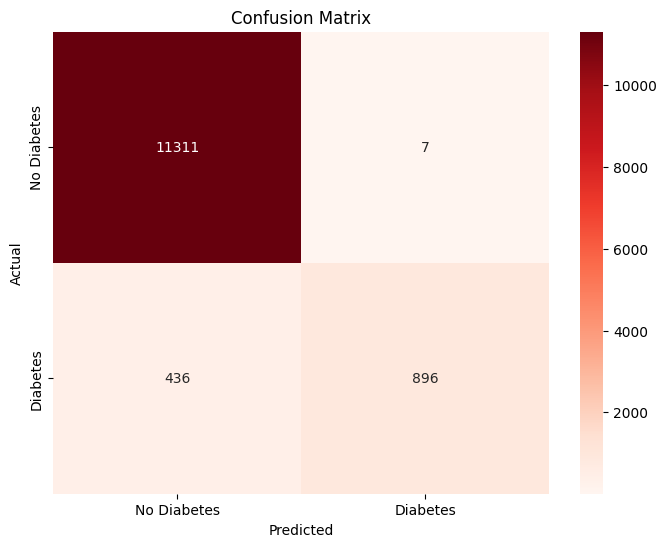

In [60]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred_best, labels=[0, 1])
# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_best)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Saved the model into pkl

In [61]:
import joblib

# Save the trained model
joblib.dump(model, 'diabetes_model.pkl')


['diabetes_model.pkl']

Load the custom data, preprocess it similarly to the training data, use the pre-trained model to make predictions, and print the diabetes status for each custom entry.

In [62]:
# Custom data
custom_data = pd.DataFrame({
    'gender': ['Female', 'Male', 'Female', 'Male', 'Female'],
    'age': [45, 35, 55, 42, 50],
    'hypertension': [0, 1, 1, 0, 1],
    'heart_disease': [0, 0, 1, 1, 0],
    'smoking_history': ['never', 'former', 'current', 'never', 'former'],
    'bmi': [25.6, 28.2, 31.4, 26.9, 29.7],
    'HbA1c_level': [6.5, 7.2, 8.0, 7.0, 7.8],
    'blood_glucose_level': [110, 130, 150, 120, 140]
})

# Load the saved model
loaded_model = joblib.load('diabetes_model.pkl')

# Encode categorical features
le = LabelEncoder()
# Apply the same transformations used during training
custom_data['gender'] = le.fit_transform(custom_data['gender'])
custom_data['smoking_history'] = le.fit_transform(custom_data['smoking_history'])

# Ensure the columns match the training data
features = ['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history', 'bmi', 'HbA1c_level', 'blood_glucose_level']
custom_data = custom_data[features]

# Make predictions with the loaded model
prediction = loaded_model.predict(custom_data)

# Display the predictions
print('Predicted Diabetes Status for Custom Data:')
for i, pred in enumerate(prediction):
    if pred == 0:
        print(f"Person {i+1} is predicted not to have diabetes.")
    else:
        print(f"Person {i+1} is predicted to have diabetes.")


Predicted Diabetes Status for Custom Data:
Person 1 is predicted not to have diabetes.
Person 2 is predicted to have diabetes.
Person 3 is predicted to have diabetes.
Person 4 is predicted to have diabetes.
Person 5 is predicted to have diabetes.


## Conclusion

In this project, a comprehensive approach was taken to develop a diabetes prediction model using machine learning techniques. The project included several key phases:

1. **Data Preparation**:
   The dataset underwent thorough preprocessing, including handling missing values, removing duplicate entries, and encoding categorical variables. This ensured that the data was clean and suitable for modeling.

2. **Dimensionality Reduction**:
   Principal Component Analysis (PCA) was applied to reduce the dimensionality of the feature set, retaining the components that capture the majority of the variance. This step facilitated more efficient and effective model training.

3. **Model Development and Evaluation**:
   XGBoost, were trained and evaluated using accuracy and cross-validation metrics. Hyperparameter tuning was performed to optimize model performance. The evaluation process included the use of confusion matrices to assess the models' effectiveness in classifying diabetes status.

4. **Visualization**:
   Data visualization techniques, including heatmaps and bar plots, were employed to present the relationships within the data and the performance of the models. These visualizations facilitated a clearer understanding of the results and model performance.

In summary, the project effectively utilized data preprocessing, dimensionality reduction, and machine learning techniques to build and evaluate a diabetes prediction model. The successful application of these methods illustrates the potential for predictive analytics in healthcare, particularly in identifying individuals at risk of diabetes.
